In [2]:
import numpy as np
from click.core import batch
from keras import datasets, layers, models, utils, preprocessing, Sequential
import matplotlib.pyplot as plt
from keras.src.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras.preprocessing import image

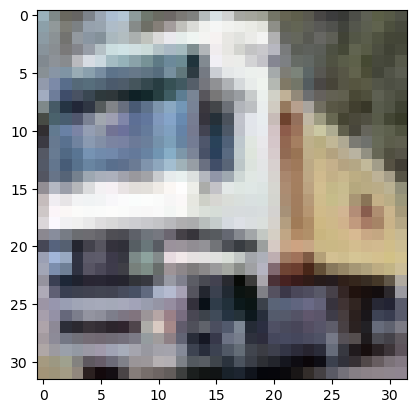

Номер класса: [9]
Тип объекта: грузовик


In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 25
img_rows, img_cols = 32, 32
img_channels = 3
classes=['самолет','автомобиль','птица','кот','олень',
         'собака','лягушка','лошадь','корабль','грузовик']
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
plt.imshow(x_train[1])
plt.show()
print("Номер класса:",y_train[1])
print("Тип объекта:",classes[y_train[1][0]])

In [4]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train=utils.to_categorical(y_train,nb_classes)
y_test=utils.to_categorical(y_test,nb_classes)

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))
print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(x_train, y_train,batch_size=batch_size,epochs=nb_epoch,validation_split=0.1,shuffle=True,verbose=1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 135ms/step - accuracy: 0.4023 - loss: 1.6335 - val_accuracy: 0.5376 - val_loss: 1.2557
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 134ms/step - accuracy: 0.5552 - loss: 1.2391 - val_accuracy: 0.6254 - val_loss: 1.0431
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.6262 - loss: 1.0501 - val_accuracy: 0.6952 - val_loss: 0.8643
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 53s 152ms/step - accuracy: 0.6736 - loss: 0.9233 - val_accuracy: 0.7184 - val_loss: 0.8126
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.7076 - loss: 0.8322 - val_accuracy: 0.7488 - val_loss: 0.7430
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 59s 169ms/step - accuracy: 0.7316 - loss: 0.7617 - val_accuracy: 0.7512 - val_loss: 0.7202
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 62s 176ms/step - accuracy: 0.7478 - loss: 0.7114 - val_accuracy: 0.7568 - val_loss: 0.7150
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 61s 175ms/step - accuracy: 0.7662 - loss: 0

In [7]:
scores=model.evaluate(x_test,y_test,verbose=0)
print("Точность работы на тестовых данных:%.2f"%(scores[1]*100))

Точность работы на тестовых данных:79.11


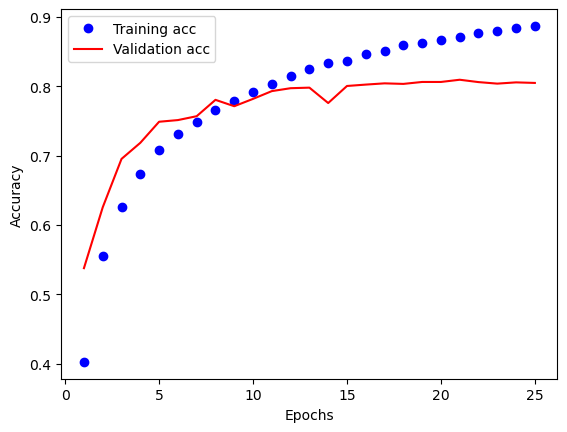

In [8]:
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epoch=range(1,len(acc_values) + 1)
plt.plot(epoch,acc_values,'bo',label='Training acc')
plt.plot(epoch,val_acc_values,'r',label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model_json=model.to_json()
json_file=open("cifar10_model.json","w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10.weights.h5")

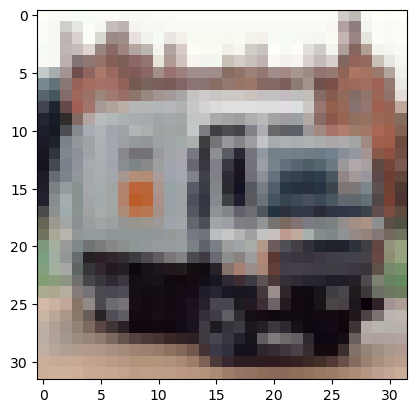

In [12]:
plt.imshow(image.array_to_img(x_test[11]))
plt.show()

In [13]:
x=x_test[11]
x=np.expand_dims(x,axis=0)

In [14]:
prediction=model.predict(x)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
[[4.5656962e-13 7.7708089e-09 1.1936805e-20 1.0796659e-17 1.6416599e-24
  3.2498094e-23 1.7826551e-19 2.9254141e-24 3.8224279e-14 1.0000000e+00]]


In [15]:
prediction=np.argmax(prediction)
print(classes[prediction])

грузовик


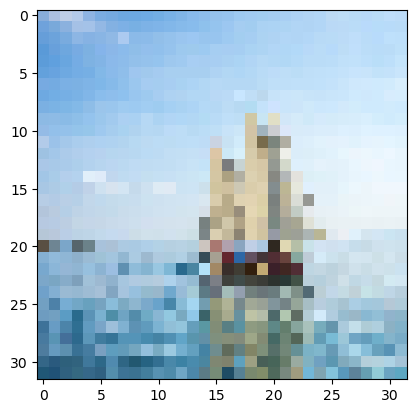

In [16]:
img=image.load_img("ship.jpg",target_size=(32,32))
plt.imshow(img)
plt.show()

In [17]:
x=image.img_to_array(img)
x/=255
x=np.expand_dims(x,axis=0)

In [19]:
prediction=model.predict(x)
prediction=np.argmax(prediction)
print(classes[prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
корабль
